In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow.keras as keras


In [4]:
from tensorflow.keras.utils import Sequence

In [5]:
data = pd.read_csv(r'C:\Users\rejee\Desktop\Agitation.csv')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data['Observation'], data['Behaviour'], test_size=0.33, random_state=42)

In [ ]:
label_dict = {'Normal':0, 'Agitation':1}
y_train = [label_dict[label] for label in y_train]
y_test = [label_dict[label] for label in y_test]


In [7]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [8]:
# Load the pre-trained word2vec model
from gensim.models import Word2Vec
word2vec = Word2Vec.load("word2vec.model")

In [9]:
# Create the embedding matrix
embedding_matrix = np.zeros((max_words, 100))
for word, i in tok.word_index.items():
    if i >= max_words:
        continue
    try:
        embedding_vector = word2vec.wv[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        pass

In [10]:
X_train = np.array(X_train)
y_train = np.array(y_train)



In [45]:
# Build the model
model = Sequential()
model.add(Embedding(max_words, 100, weights=[embedding_matrix], input_length=max_len, trainable=False))
model.add(LSTM(128))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
history = model.fit(sequences_matrix, y_train, batch_size=128, epochs=10, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
2/2 [==============================] - 3s 680ms/step - loss: 0.6921 - accuracy: 0.8024 - val_loss: 0.6775 - val_accuracy: 0.9524
Epoch 2/10
2/2 [==============================] - 1s 202ms/step - loss: 0.6813 - accuracy: 0.8024 - val_loss: 0.6525 - val_accuracy: 0.9524


In [36]:


# Evaluate the model
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)
accr = model

In [37]:
test_sequences_matrix = np.array(test_sequences_matrix)
y_test = np.array(y_test)

In [27]:
from keras.models import Model

In [38]:
scores = model.evaluate(test_sequences_matrix, y_test)
print("Accuracy:", scores[1])

4/4 [==============================] - 0s 23ms/step - loss: 0.6652 - accuracy: 0.8252
Accuracy: 0.8252426981925964


In [39]:
# Make predictions on the test data
predictions = model.predict(test_sequences_matrix)

4/4 [==============================] - 1s 30ms/step


In [40]:
# Round the predictions to 0 or 1
predictions = [round(x[0]) for x in predictions]

# Calculate the accuracy
accuracy = sum([1 if predictions[i] == y_test[i] else 0 for i in range(len(predictions))]) / len(predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8252427184466019


In [31]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test, predictions, target_names = ['Normal','Agitation']))

              precision    recall  f1-score   support

      Normal       0.83      1.00      0.90        85
   Agitation       0.00      0.00      0.00        18

    accuracy                           0.83       103
   macro avg       0.41      0.50      0.45       103
weighted avg       0.68      0.83      0.75       103



C:\Users\rejee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rejee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rejee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


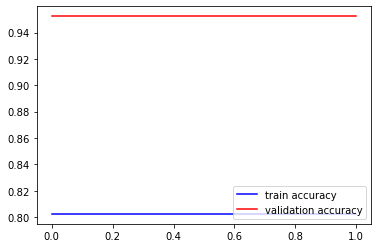

In [42]:
plt.plot(history.history['accuracy'],c='b',label='train accuracy')
plt.plot(history.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()

In [1]:
plt.plot(history.history['loss'],c='b',label='train loss')
plt.plot(history.history['val_loss'],c='r',label='validation loss')
plt.legend(loc='lower right')
plt.show()

NameError: name 'plt' is not defined